In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/test123/secondday.ipynb
/kaggle/input/test123/myfunc.py
/kaggle/input/cardataset/data.csv


In [2]:
# Read the testing dataset
df = pd.read_csv('/kaggle/input/cardataset/data.csv')

df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [4]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [5]:
df['Make'].unique()

array(['BMW', 'Audi', 'FIAT', 'Mercedes-Benz', 'Chrysler', 'Nissan',
       'Volvo', 'Mazda', 'Mitsubishi', 'Ferrari', 'Alfa Romeo', 'Toyota',
       'McLaren', 'Maybach', 'Pontiac', 'Porsche', 'Saab', 'GMC',
       'Hyundai', 'Plymouth', 'Honda', 'Oldsmobile', 'Suzuki', 'Ford',
       'Cadillac', 'Kia', 'Bentley', 'Chevrolet', 'Dodge', 'Lamborghini',
       'Lincoln', 'Subaru', 'Volkswagen', 'Spyker', 'Buick', 'Acura',
       'Rolls-Royce', 'Maserati', 'Lexus', 'Aston Martin', 'Land Rover',
       'Lotus', 'Infiniti', 'Scion', 'Genesis', 'HUMMER', 'Tesla',
       'Bugatti'], dtype=object)

In [6]:
len(df['Model'].unique())

915

**LECTURE STARTS**
* Python Basics
* Data structures, functions
* Numpy
* Pandas
* Data loading, storage and file formats

* Link to the book: https://wesmckinney.com/book/python-builtin.html

**Things I have learned:**
* Everything in Python is an object: number, string, function, class, etc.

**Python Basics**

In [7]:
b = 1.3
isinstance(b, float)

True

In [8]:
listOfNumbers = [(1, 3), (0, 0), (0, -4.5), (4.5, 4.5), (-3.9, 0), (2.2, 2.2), (9.2, -9.2), (2.8, 3.8), (-2, -8), (-3.4, 0)]

for eachTuple in listOfNumbers:
    
    a,b = eachTuple

    def func(a,b):
        if a > 0 and b != 0:
            print(f'Compute a/b: {a/b:.2f}')
            return True

        else:
            print(f'The value of a: {a} and the value of {b}')
            return False

    func(a,b)

Compute a/b: 0.33
The value of a: 0 and the value of 0
The value of a: 0 and the value of -4.5
Compute a/b: 1.00
The value of a: -3.9 and the value of 0
Compute a/b: 1.00
Compute a/b: -1.00
Compute a/b: 0.74
The value of a: -2 and the value of -8
The value of a: -3.4 and the value of 0


* Mutable & Immutable

* * A tuple is immutable

* * A list is mutable
* a[0] = 1
* * A string is immutable
* The above could not be done for strings

* * Strings could be converted to a list

* Computing execution time

In [9]:
from datetime import datetime

dt = datetime(2022, 11, 28, 10, 35)
dt2 = datetime(2025, 11, 18, 10, 35)

* Atributes and functions in Python

In [10]:
dt.year

2022

In [11]:
dt.date()

datetime.date(2022, 11, 28)

In [12]:
dt.time()

datetime.time(10, 35)

In [13]:
dt2-dt

datetime.timedelta(days=1086)

In [14]:
a = 1.3

if a > 1:
    pass
else:
    print(a)

In [15]:
for i in range(4):
    for j in range(5):
        if j == 3: 
            continue # skip no. 3
        print(f'i and j are {i}, {j}')

i and j are 0, 0
i and j are 0, 1
i and j are 0, 2
i and j are 0, 4
i and j are 1, 0
i and j are 1, 1
i and j are 1, 2
i and j are 1, 4
i and j are 2, 0
i and j are 2, 1
i and j are 2, 2
i and j are 2, 4
i and j are 3, 0
i and j are 3, 1
i and j are 3, 2
i and j are 3, 4


In [16]:
values = 1,2,3,4,5,6

a,b, *_ = values

print(f'{a} {b} {_}')

1 2 [3, 4, 5, 6]


# Delete elements in a dict:

### 'del' command
### 'pop' command


### Append dictionaries:
### 'update' command

# Default dictionary concept?

# Sets
* Sets disregard the sequence
* Union
* Intersection

# Second Exercise

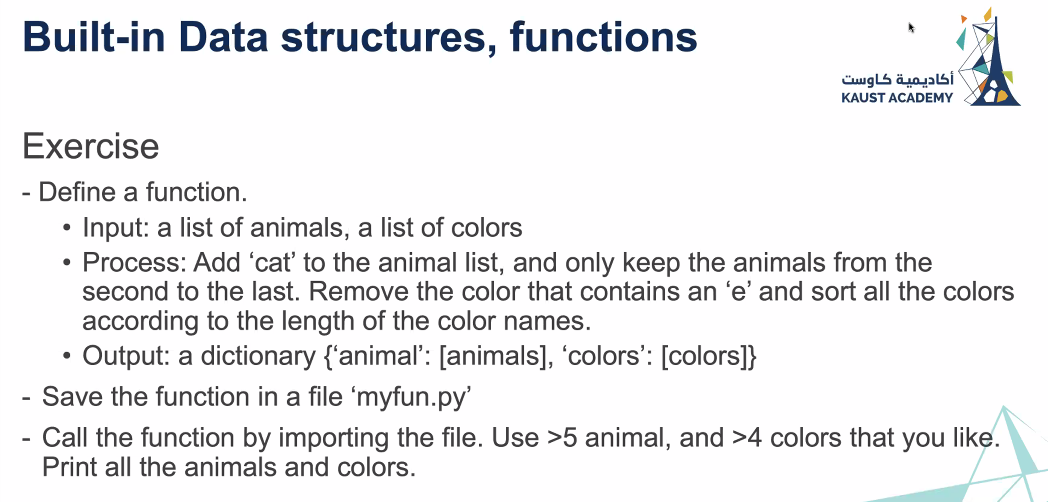

In [17]:
animals = ['dog', 'giraff', 'monkey', 'donkey', 'fish', 'shark', 'camel', 'spider']
colors = ['red', 'green', 'blue', 'black','white', 'purple', 'brown', 'pink']

def myfunc(animals, colors):
    
    # Adding 'cat' to the list
    animals.append('cat')
    animals = animals[1:]

    colors = [i for i in colors if not 'e' in i]

    colors = sorted(colors, key=len) # another soln that happens inplace as well: colors.sort(key=len)

    return {'animals': animals, 'colors': colors}

newDict = myfunc(animals, colors)
print(newDict)

{'animals': ['giraff', 'monkey', 'donkey', 'fish', 'shark', 'camel', 'spider', 'cat'], 'colors': ['pink', 'black', 'brown']}


# Numpy

## Positional and Keyword arguments for functions
* Positional arguments, depend on the position of gthe variable
* Keywords are always after the positional, are used if you don't remember the location of the arguments of the function

# Generator

In [18]:
def squares (n=10):
    print(f'Generating squares froom 1 to {n**2}')
    for i in range(1, n+1):
        return i**2

In [19]:
squares(n=4)

Generating squares froom 1 to 16


1

In [20]:
# Generator
def squares (n=10):
    print(f'Generating squares froom 1 to {n**2}')
    for i in range(1, n+1):
        yield i**2 # compared to 'return', 'yield' waits until it is called for it to execute

In [21]:
for x in squares(4):
    print(x)

Generating squares froom 1 to 16
1
4
9
16


In [22]:
# The values of the generator could also be saved

mylist = squares(n=4)
list(mylist)

Generating squares froom 1 to 16


[1, 4, 9, 16]

# Errors

In [23]:
def attempt_float(x):
    try:
        return float(x)
    except:
        return x
    # else:  # if the operation was successful

In [24]:
attempt_float("1.2345")

1.2345

In [25]:
attempt_float("something")

'something'

In [26]:
def attempt_float(x):
    try:
        return float(x)
    except (ValueError, TypeError):
        return x

In [27]:
attempt_float(['1',2])

['1', 2]

# Files

In [28]:
pwd # Checking the directory of the notebook

'/kaggle/working'

In [29]:
myCode = """
def myfunc(animals, colors):
    
    # Adding 'cat' to the list
    animals.append('cat')
    animals = animals[1:]

    colors = [i for i in colors if not 'e' in i]

    colors = sorted(colors, key=len) # another soln that happens inplace as well: colors.sort(key=len)

    return {'animals': animals, 'colors': colors}
"""

In [30]:
import os
path = 'my_fun.py'

ourFile = open(path, 'w')

ourFile

<_io.TextIOWrapper name='my_fun.py' mode='w' encoding='UTF-8'>

In [31]:
ourFile.write(myCode)

323

In [32]:
ourFile.close()

In [33]:
from my_fun import myfunc

animals = ['dog', 'giraff', 'monkey', 'donkey', 'fish', 'shark', 'camel', 'spider']
colors = ['red', 'green', 'blue', 'black','white', 'purple', 'brown', 'pink']
newDict = myfunc(animals, colors)
print(newDict)

{'animals': ['giraff', 'monkey', 'donkey', 'fish', 'shark', 'camel', 'spider', 'cat'], 'colors': ['pink', 'black', 'brown']}


# Numpy

[[ 1.32100524 -0.09027089  0.68389168  0.18293127 -2.23870643 -0.8496397
  -0.61746142 -0.30885639 -0.82982979  0.87572208  0.87768803  1.1289042
   0.31795465  0.35549377  1.19848154 -1.38036287  0.67642474  1.03135357
  -1.50068074  0.35404993 -0.80263205  2.19045163 -1.44307171  0.08426199
  -0.94280936  0.77315081 -0.23894773 -0.37919011  0.59527806 -0.83155901]]


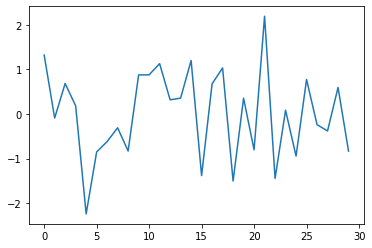

In [34]:
import numpy as np
import matplotlib.pyplot as plt

samples = np.random.standard_normal(size=(1, 30))

# Plotting to observe the normal 

print(samples)

plt.plot(range(len(samples[0])), samples[0])

In [35]:
arr = np.zeros((1,1), dtype=int)

steps = 1000

for i in range(steps):
    arr = np.append(arr, np.random.choice((-1, 1), p = [0.5, 0.5]) + arr[-1])

In [36]:
arr

array([  0,  -1,   0, ..., -18, -17, -18])

In [37]:
print(f'The length of the array is: {len(arr)} and the max no. is: {max(arr)} and the min no. is: {min(arr)}')

The length of the array is: 1001 and the max no. is: 15 and the min no. is: -32


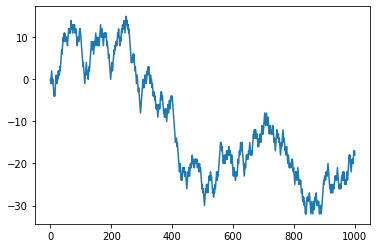

In [38]:
import matplotlib.pyplot as plt
plt.plot(range(1001), arr)

In [39]:
np.save('RandomWalk', arr)

In [40]:
np.load('RandomWalk.npy')

array([  0,  -1,   0, ..., -18, -17, -18])

# Pandas

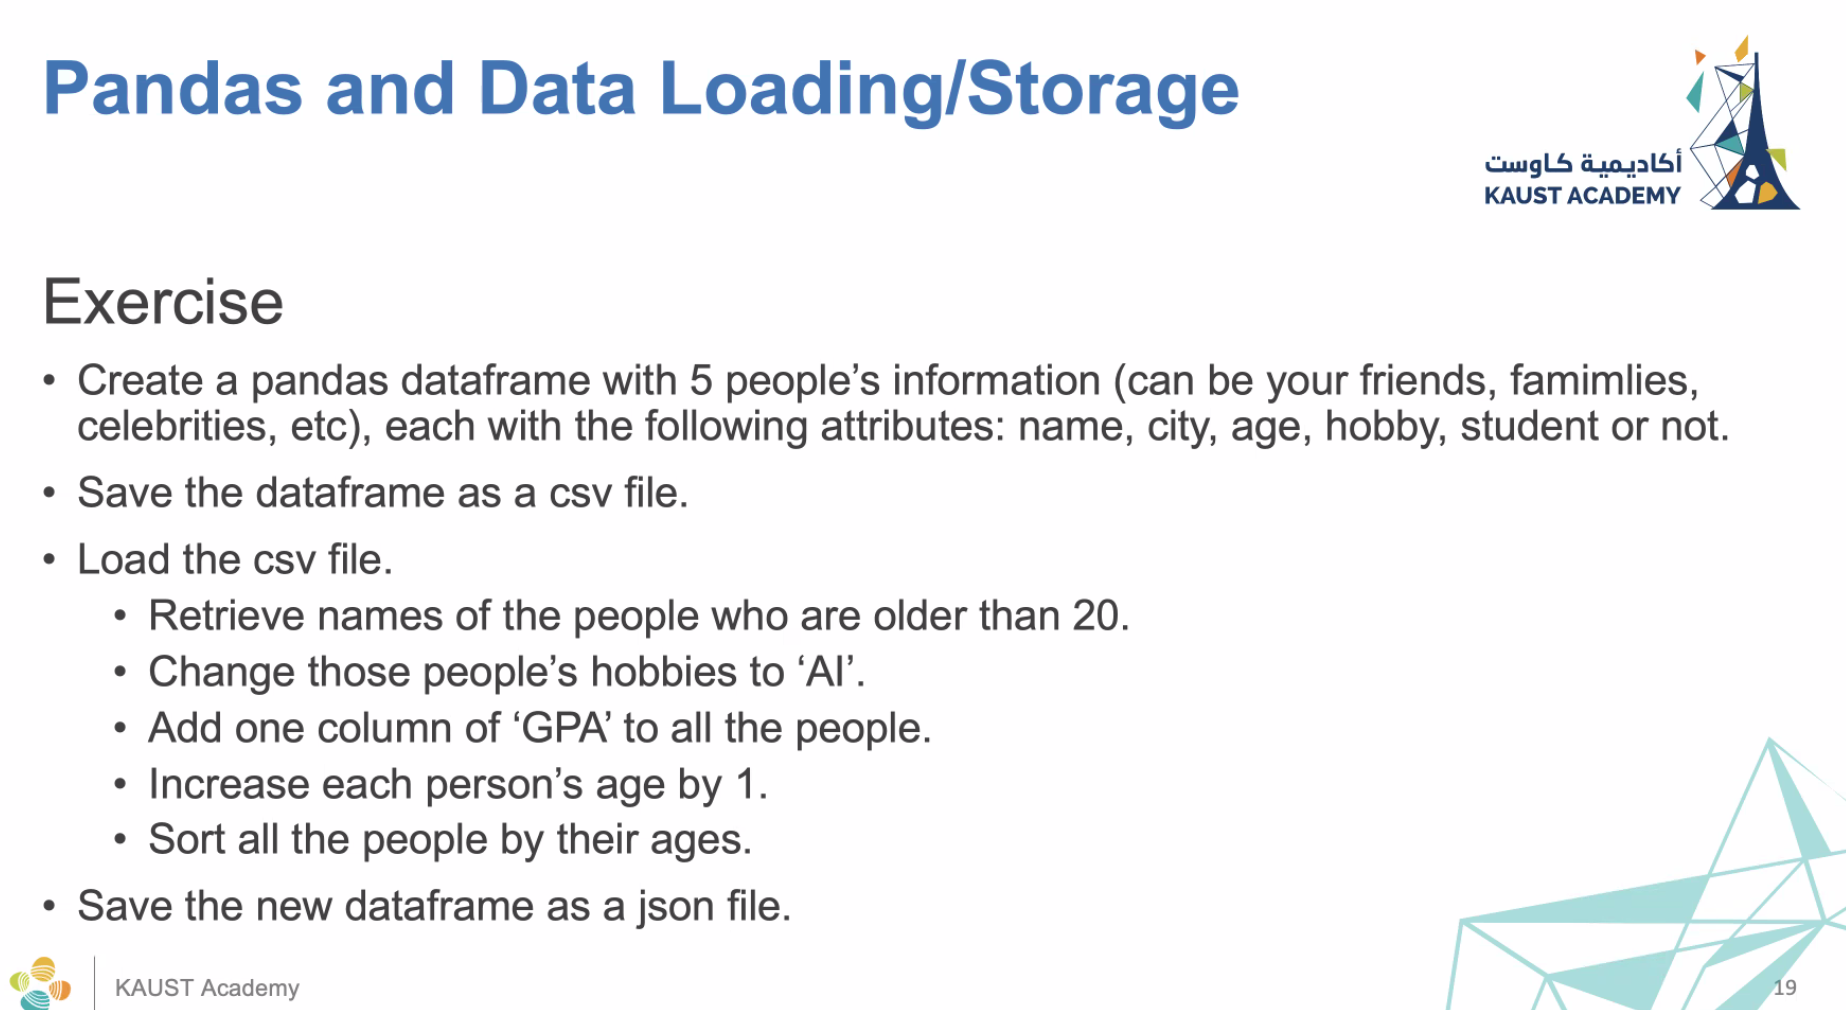

In [41]:
import pandas as pd

data = {'name': ['Ali', 'Kumail', 'Mohammed', 'Ahmed', 'Redah'],
        'city': ['Jeddah', 'Dammam','Jubail', 'Jeddah', 'Dammam'],
        'hobby': ['Programming', 'Football', 'Reading', 'Gaming', 'Training'],
        'age': [20, 19, 40, 39, 19],
        'student': [True, True, False, False, True]
}

df = pd.DataFrame(data)

df

,name,city,hobby,age,student
0,Ali,Jeddah,Programming,20,True
1,Kumail,Dammam,Football,19,True
2,Mohammed,Jubail,Reading,40,False
3,Ahmed,Jeddah,Gaming,39,False
4,Redah,Dammam,Training,19,True


In [42]:
df.to_csv('out.csv',index=False)

In [43]:
df = pd.read_csv('out.csv')

df

,name,city,hobby,age,student
0,Ali,Jeddah,Programming,20,True
1,Kumail,Dammam,Football,19,True
2,Mohammed,Jubail,Reading,40,False
3,Ahmed,Jeddah,Gaming,39,False
4,Redah,Dammam,Training,19,True


In [44]:
df.loc[df['age']>20, 'name']

2    Mohammed
3       Ahmed
Name: name, dtype: object

In [45]:
df.loc[df['age']>20, 'hobby'] = ['AI', 'AI']
df

,name,city,hobby,age,student
0,Ali,Jeddah,Programming,20,True
1,Kumail,Dammam,Football,19,True
2,Mohammed,Jubail,AI,40,False
3,Ahmed,Jeddah,AI,39,False
4,Redah,Dammam,Training,19,True


In [46]:
df['GPA'] = [3.8, 2.6, 2.0, 3.4, 3.2]

df

,name,city,hobby,age,student,GPA
0,Ali,Jeddah,Programming,20,True,3.8
1,Kumail,Dammam,Football,19,True,2.6
2,Mohammed,Jubail,AI,40,False,2.0
3,Ahmed,Jeddah,AI,39,False,3.4
4,Redah,Dammam,Training,19,True,3.2


In [47]:
df['age'] += 1

df

,name,city,hobby,age,student,GPA
0,Ali,Jeddah,Programming,21,True,3.8
1,Kumail,Dammam,Football,20,True,2.6
2,Mohammed,Jubail,AI,41,False,2.0
3,Ahmed,Jeddah,AI,40,False,3.4
4,Redah,Dammam,Training,20,True,3.2


In [48]:
df.sort_values('age')

,name,city,hobby,age,student,GPA
1,Kumail,Dammam,Football,20,True,2.6
4,Redah,Dammam,Training,20,True,3.2
0,Ali,Jeddah,Programming,21,True,3.8
3,Ahmed,Jeddah,AI,40,False,3.4
2,Mohammed,Jubail,AI,41,False,2.0


In [49]:
df.to_json('out.json')